# Polspice:
website for it: http://www2.iap.fr/users/hivon/software/PolSpice/  
quote from the website:
> This Fortran90 program measures the 2 point auto (or cross-) correlation functions w(θ) and the angular auto- (or cross-) power spectra C(ℓ) from one or (two) sky map(s) of Stokes parameters (intensity I and linear polarisation Q and U). It is based on the fast Spherical Harmonic Transforms allowed by isolatitude pixelisations such as HEALPix [for Npix pixels over the whole sky, and a C(ℓ) computed up to ℓ=ℓmax, PolSpice complexity scales like Npix1/2 ℓmax2 instead of Npix ℓmax2]. It corrects for the effects of the masks and can deal with inhomogeneous weights given to the pixels of the map. In the case of polarised data, the mixing of the E and B modes due to the cut sky and pixel weights can be corrected for to provide an unbiased estimate of the "magnetic" (B) component of the polarisation power spectrum. Most of the code is parallelized for shared memory (SMP) architecture using OpenMP.

- First of all, download the lastest version of Polspice package via [this link](ftp://ftp.iap.fr/pub/from_users/hivon/PolSpice/PolSpice_v03-03-01.tar.gz) in the website.
- after `tar xvf PolSpice_v03-03-01.tar`, you will see:

In [ ]:
!tar xvf 'PolSpice_v03-03-01.tar'

In [1]:
!ls 'PolSpice_v03-03-01/'

HISTORY      INSTALL      README       python_spice src          tutorials


**Read the INSTALL for instructions**

In [ ]:
# %load 'PolSpice_v03-03-01/INSTALL'

PolSpice installation   (2016-08-09)
=====================

background: 
----------
see HISTORY 

usage:
-----
see README

required libraries:
------------------
	- Healpix 3.2+        (http://healpix.sourceforge.net)

	- cfitsio 3.2+        (http://heasarc.nasa.gov/fitsio/fitsio.html)

	- Piolib is only necessary to people working in connection with
	the Planck HFI Data Processing Center. 
	Those people should rather use the HL2 CVS server
	to obtain the full analysis pipeline, including PolSpice

installation:
------------
in src/ create a Makefile adapted to your 
compiler and system configuration,
using Makefile_template as a template.
*** Make sure that each file ending with .F90
 is preprocessed (with cpp or fpp) before compilation ***
Then do   make
and read the README
or do
spice -help

- The requirements are Healpix and cfitsio
- Specify them in your Makefile using the given Makefile_template in `'PolSpice_v03-03-01/'`
- Specify you F90 complier and compile option

In [ ]:
# %load 'PolSpice_v03-03-01/src/Makefile_template'
#
# Makefile to customize for your system
#
# system variable HEALPIX must be defined for compilation
#  and at run time
#
FC = gfortran                	# F90 compiler
FCFLAGS = -O2			# compiler options
FITSLIB = /usr/local/lib/		# cfitsio library location (directory)
SUFF   = 	# Healpix f90 include and lib suffix
HPXINC = $(HEALPIX)/include$(SUFF)  # Healpix f90 include files location
HPXLIB = $(HEALPIX)/lib$(SUFF)      # Healpix f90 library location
#
INC = -I. -I$(HPXINC)
LIBS = -L$(HPXLIB) -lhealpix -L$(FITSLIB) -lcfitsio
#

OPARAMS = spice_parameters.o
OCOMMON = spice_common.o
OOTHERS = apodize_mod.o \
	rec3jj.o \
	cumul2.o \
	compute_windows.o \
	do_legendre.o \
	convert_to_ascii.o \
	deal_with_filenames.o \
	deal_with_options.o \
	deal_with_files.o \
	deal_with_xi_and_cl.o \
	remove_dipole_mod.o \
	spice_subs.o

OBJS = 	$(OPARAMS) $(OCOMMON) $(OOTHERS) 

all:	spice  

spice:	$(OBJS) spice.o
	$(FC) $(FCFLAGS) $(OBJS) spice.o -o $@ $(LIBS)

clean:
	rm -f *.o *.d *.mod spice 

.SUFFIXES:
.SUFFIXES: .F90 .f90 .o 
.f90.o:
	$(FC) $(FCFLAGS) $(INC) -c $< -o $@
.F90.o:
	$(FC) $(FCFLAGS) $(INC) -c $< -o $@

# dependencies
$(OCOMMON):$(OPARAMS)
$(OOTHERS):$(OCOMMON)


- After installing, you can run spice in command line

In [11]:
!'PolSpice_v03-03-01/src/spice' -usage


USAGE : spice
              -about
              -apodizesigma [dfloat] -apodizetype [0|1] 
              -beam [dfloat] -beam_file [name]
              -beam2 [dfloat] -beam_file2 [name]
              -clfile [name]
              -cl_inmap_file [name]
              -cl_inmask_file [name]
              -cl_outmap_file [name]
              -cl_outmask_file [name]
              -corfile [name]
              -covfileout [name]
              -decouple [YES|NO]
              -dry [YES|NO]
              -extramapfile [name] -extramapfile2 [name]
              -fits_out [YES|NO]
              -help
              -history
              -kernelsfileout [name]
              -listmapfiles1_*    [name]  -listmapfiles2_*   [name]
              -listmapweights1_* [dfloat] -listmapweights2_* [dfloat]
              -mapfile [name] -mapfile2 [name]
              -maskfile [name] -maskfile2 [name]
              -maskfilep [name] -maskfilep2 [name]
              -nlmax [integer]
              -normfac [

In [63]:
%autosave 0

Autosave disabled


**Polspice Usage**  
Let's try to generate cl file out of nilc with mask

In [61]:
%%bash
PolSpice_v03-03-01/src/spice -mapfile COM_CMB_IQU-nilc-field-Int_2048_R2.01_full.fits \
-verbosity 2 -clfile YES -corfile YES -cl_outmap_file YES -cl_outmask_file YES -fits_out YES -kernelsfileout YES

 WARNING in check_options_choice :
 Polarization is off and output of kernels is activated.
 Output of kernels will be ignored.
 ===> HEALPIXDATA not defined, trying HEALPIX...
 ===> Using HEALPIXDATA=/Users/cicero/Documents/Physics/PLANCK/analysis_tool/Healpix_3.31/data/
 Check header for file ../analysis_tool/PolSpice_v03-03-01/tutorials/cart_mask/COM_CMB_IQU-nilc-field-Int_2048_R2.01_full.fits
 nside for input map file =        2048

 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
 WARNING in check_header:
 I detect multiple maps in file
 ../analysis_tool/PolSpice_v03-03-01/tutorials/cart_mask/COM_CMB_IQU-nilc-field-Int_2048_R2.01_full.fits
 Only the first map will be read.
 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

 WARNING in check_header for file
 ../analysis_tool/PolSpice_v03-03-01/tutorials/cart_mask/COM_CMB_IQU-nilc-field-Int_2048_R2.01_full.fits
 pixel ordering is NESTED :
 data will be reordered before usage
 F F
 pixel_window_n                             

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


(0, 8000)

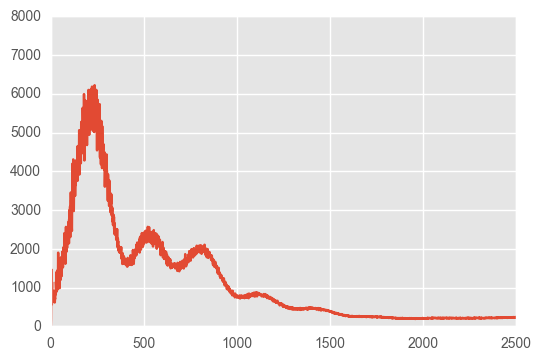

In [62]:
# spice
cl_out = hp.read_cl('spice.cl')
ell    = np.arange(len(cl_out))
plt.plot(ell, cl_out * ell * (ell + 1) / 2 / np.pi * 10 **12.)
plt.xlim(0, 2500)
plt.ylim(0, 8000)

# Mask file adapted Squares on Equators
- I wrote a small function to generate mask files, which contains 0 or 1 values for healpix pixels (1 for unmask, 0 for mask)


Make sure you can import all modules

In [1]:
import numpy as np
from numpy import asarray as ar
import healpy as hp
from matplotlib import pyplot as plt
plt.style.use('ggplot')

# and import my functions library
from mifipy import mfun, Yakitori

# run the helper functions
%run 'helper.ipynb'

# make plot can show in the notebook
%matplotlib inline

If there are some modules not in your site-packages, `conda` it or `pip` it.

In [ ]:
!conda install -c conda-forge healpy=1.9.1

In [ ]:
!pip install --user healpy

Below is the function to generate mask file

In [24]:
def mask_cart(corner_x, cmbmap, phisize):
    # Healpix patch catch process
    img   = cmbmap.copy()
    NSIDE = hp.get_nside(img)
    pixtheta, pixphi = hp.pix2ang(NSIDE,
                                  np.arange(hp.nside2npix(NSIDE)))
    # rescaling rad to degree
    pixtheta *= 180 / np.pi
    pixphi   *= 180 / np.pi

    # 0 1 mask making
    img[ar(pixtheta > 90 - phisize / 2) & ar(pixtheta < 90 + phisize / 2)  & 
        ar(pixphi > corner_x)           & ar(pixphi < corner_x + phisize)] = 1
    
    return img

- `corner_x` is just the starting point of the patch in unit `phi`, e.g., if you want a patch from $\phi = 0$ to $\phi = 20$,  
then the `corner_x` is `0` and `phisize` is 20
- `cmbmap` is the input healpix map

The following example will show how to generate a `20*20` patch from $\phi = 180$ to $\phi = 200$ with rotation $\theta = 45$

/Users/cicero/anaconda/envs/snakes/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


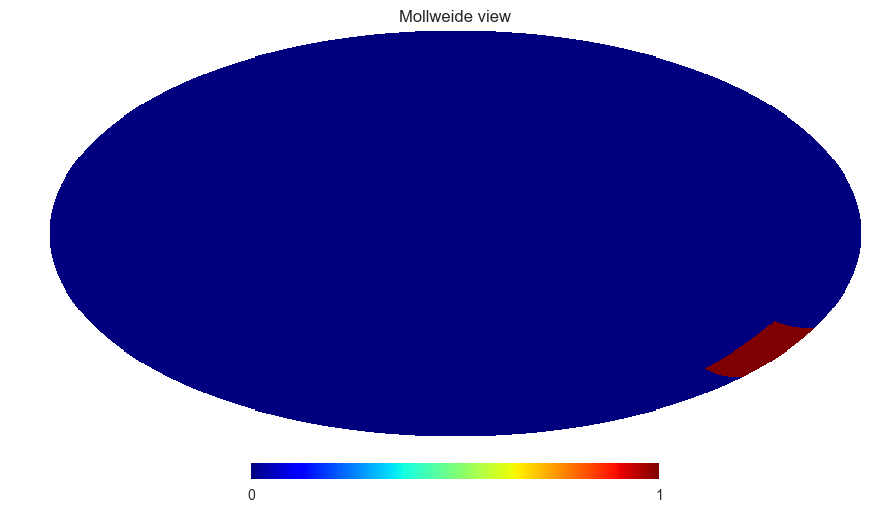

In [30]:
nside = 2048
healpix_map = np.zeros(hp.nside2npix(nside), dtype=np.double)
img         = mask_cart(180, healpix_map, 20)
img         = healpix_rotate(img, rot=(0, -45))
hp.mollview(img, )

`healpix_rotate(healpix_map, rot=(phi, theta))` is just a helper function for pixel rotation

In [31]:
def healpix_rotate(healpix_map, rot):
    # pix-vec
    ipix = np.arange(len(healpix_map))
    nside = np.sqrt(len(healpix_map) / 12)
    if int(nside) != nside: return print('invalid nside');
    nside = int(nside)
    vec = hp.pix2vec(int(nside), ipix)
    rot_vec = (hp.rotator.Rotator(rot=rot)).I(vec)
    irotpix = hp.vec2pix(nside, rot_vec[0], rot_vec[1], rot_vec[2])
    return np.copy(healpix_map[irotpix])

To save img as .fits, use `hp.write_map(fname, m)`

In [ ]:
hp.write_map('mask.fits', img)

- Now, we can loop the functions to write .fits file for masks

In [ ]:
# %load 'Mask.patch.py'
import healpy as hp
import numpy as np
from numpy import asarray as ar
from mifipy import Yakitori, mfun

def mask_cart(corner_x, cmbmap, phisize):
    # Healpix patch catch process
    img   = cmbmap.copy()
    NSIDE = hp.get_nside(img)
    pixtheta, pixphi = hp.pix2ang(NSIDE,
                                  np.arange(hp.nside2npix(NSIDE)))
    # rescaling rad to degree
    pixtheta *= 180 / np.pi
    pixphi   *= 180 / np.pi

    # 0 1 mask making
    img[ar(pixtheta > 90 - phisize / 2) & ar(pixtheta < 90 + phisize / 2)  & 
        ar(pixphi > corner_x)           & ar(pixphi < corner_x + phisize)] = 1
    
    return img

def main():
    a = [0, 1, 2, 3, 4, 5, 6, 7]
    b = [[15], [0, 9, 17], [0, 1, 2, 6, 7, 8, 9, 10, 11, 15, 16, 17], [0, 8, 9, 17], [0, 1, 2, 6, 7, 8, 9, 10, 11, 15, 16, 17], [0, 8, 9, 17], [0, 1, 2, 6, 7, 8, 9, 10, 11, 15, 16, 17], [0, 8, 9, 17]]
    size       = 20
    theta_size = 22.5
    nside      = 2048
    mask = np.zeros(hp.nside2npix(nside), dtype=np.double)

    for i, (phi, theta) in enumerate(Yakitori.Yakitori2tuple(a, b, theta_size, size)):
        print ('phi is {}, theta is {}'.format(phi, theta))
        # convert convention from 180 <- -180 to 180 <- 0 = 360 <- 180
        if phi <= 0:
            phi = phi + 360
        img  = mask_cart(phi - size, mask, size, )
        img  = mfun.healpix_rotate(img, rot=(0, -theta))
        hp.write_map('mask' + str(i).zfill(3) + '.' + 
                     str(phi - size) + 'p' + 
                     str(theta)      + 't' + '.fits', 
                     img)
        del img

if __name__=="__main__":
    main()

- in terminal, type `python Mask.patch.py`

- `a` and `b` are chosen `theta` and `phi`, they are available to decode into normal form with function:

In [32]:
a = [0, 1, 2, 3, 4, 5, 6, 7]
b = [[15], [0, 9, 17], [0, 1, 2, 6, 7, 8, 9, 10, 11, 15, 16, 17], [0, 8, 9, 17], [0, 1, 2, 6, 7, 8, 9, 10, 11, 15, 16, 17], [0, 8, 9, 17], [0, 1, 2, 6, 7, 8, 9, 10, 11, 15, 16, 17], [0, 8, 9, 17]]
phi_size   = 20
theta_size = 22.5

print (Yakitori.Yakitori2tuple(a, b, theta_size, phi_size))

[(-120, 0.0), (180, 22.5), (0, 22.5), (-160, 22.5), (180, 45.0), (160, 45.0), (140, 45.0), (60, 45.0), (40, 45.0), (20, 45.0), (0, 45.0), (-20, 45.0), (-40, 45.0), (-120, 45.0), (-140, 45.0), (-160, 45.0), (180, 67.5), (20, 67.5), (0, 67.5), (-160, 67.5), (180, 90.0), (160, 90.0), (140, 90.0), (60, 90.0), (40, 90.0), (20, 90.0), (0, 90.0), (-20, 90.0), (-40, 90.0), (-120, 90.0), (-140, 90.0), (-160, 90.0), (180, 112.5), (20, 112.5), (0, 112.5), (-160, 112.5), (180, 135.0), (160, 135.0), (140, 135.0), (60, 135.0), (40, 135.0), (20, 135.0), (0, 135.0), (-20, 135.0), (-40, 135.0), (-120, 135.0), (-140, 135.0), (-160, 135.0), (180, 157.5), (20, 157.5), (0, 157.5), (-160, 157.5)]


or for phi range from 0 to 360

In [35]:
print([(c[0], c[1]) if c[0] > 0 else (c[0] + 360, c[1]) for c in Yakitori.Yakitori2tuple(a, b, theta_size, phi_size)])

[(240, 0.0), (180, 22.5), (360, 22.5), (200, 22.5), (180, 45.0), (160, 45.0), (140, 45.0), (60, 45.0), (40, 45.0), (20, 45.0), (360, 45.0), (340, 45.0), (320, 45.0), (240, 45.0), (220, 45.0), (200, 45.0), (180, 67.5), (20, 67.5), (360, 67.5), (200, 67.5), (180, 90.0), (160, 90.0), (140, 90.0), (60, 90.0), (40, 90.0), (20, 90.0), (360, 90.0), (340, 90.0), (320, 90.0), (240, 90.0), (220, 90.0), (200, 90.0), (180, 112.5), (20, 112.5), (360, 112.5), (200, 112.5), (180, 135.0), (160, 135.0), (140, 135.0), (60, 135.0), (40, 135.0), (20, 135.0), (360, 135.0), (340, 135.0), (320, 135.0), (240, 135.0), (220, 135.0), (200, 135.0), (180, 157.5), (20, 157.5), (360, 157.5), (200, 157.5)]


# Polspice versus Anafast
- If there is no mask or weight, spice will be the same as anafast, described in the `README` in Polspice package: (quote)
> If there is no mask/weight, spice is nearly equivalent to anafast, and
the order of operations is the following :  
    -   (1a) map average subtraction, if required  
    -   (2a) calculation of Cl  
    -   (3a) pixel window correction, beam correction, transfer function correction, renormalization, if required  
    -   (4a) calculation of the 2pt correlation function, xi, if needed  
    -   (5a) apodization of xi and calculation of the final Cl, if  needed  
    -   (6a) subtraction of noise bias on Cl and/or xi, if applicable  
    


Please choose your own options below,  
For my options:
- maskfile: I choose a square with 20deg * 20 deg mask
- mapfile: nilc T map
- apodizesigma: 10 deg
- apodizetype: 1 for consine window function
- beam: 5 arcmin beam transfer function

<div class="burk">
Replace your own map file (in  healpix fits) and mask file (in healpix fits) for the commandline below
</div><i class="fa fa-lightbulb-o "></i>

In [40]:
%%bash
PolSpice_v03-03-01/src/spice -mapfile COM_CMB_IQU-nilc-field-Int_2048_R2.01_full.fits \
-apodizesigma 10 -apodizetype 1 -thetamax 10 -beam 5 -maskfile mask000.220p0.0t.fits \
-verbosity 2 -clfile YES -corfile YES -cl_outmap_file YES -cl_outmask_file YES -fits_out YES -kernelsfileout YES

 WARNING in check_options_choice :
 Polarization is off and output of kernels is activated.
 Output of kernels will be ignored.
 ===> HEALPIXDATA not defined, trying HEALPIX...
 ===> Using HEALPIXDATA=/Users/cicero/Documents/Physics/PLANCK/analysis_tool/Healpix_3.31/data/
 Check header for file ../analysis_tool/PolSpice_v03-03-01/tutorials/cart_mask/COM_CMB_IQU-nilc-field-Int_2048_R2.01_full.fits
 nside for input map file =        2048

 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
 WARNING in check_header:
 I detect multiple maps in file
 ../analysis_tool/PolSpice_v03-03-01/tutorials/cart_mask/COM_CMB_IQU-nilc-field-Int_2048_R2.01_full.fits
 Only the first map will be read.
 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

 WARNING in check_header for file
 ../analysis_tool/PolSpice_v03-03-01/tutorials/cart_mask/COM_CMB_IQU-nilc-field-Int_2048_R2.01_full.fits
 pixel ordering is NESTED :
 data will be reordered before usage
 Check header for file ../analysis_tool/PolSpice_

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


(0, 8000)

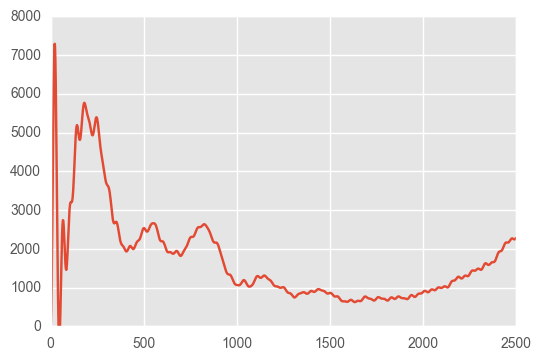

In [46]:
# spice
cl = hp.read_cl('spice.cl')
ell = np.arange(len(cl))
plt.plot(ell, cl * ell * (ell + 1) / 2 / np.pi * 10 **12.)
plt.xlim(0, 2500)
plt.ylim(0, 8000)

Redo this mask map with anafast

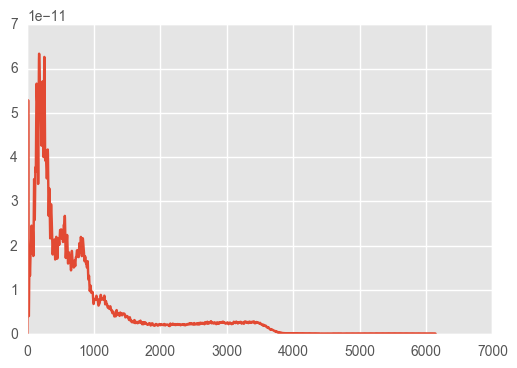

In [45]:
# anafast
mask    = hp.read_map('../analysis_tool/PolSpice_v03-03-01/tutorials/cart_mask/mask000.220p0.0t.fits', verbose=0)
cmbmap  = hp.read_map('../analysis_tool/PolSpice_v03-03-01/tutorials/cart_mask/COM_CMB_IQU-nilc-field-Int_2048_R2.01_full.fits', verbose=0)
ana_cl  = hp.anafast(mask * cmbmap, )
ana_ell = np.arange(len(ana_cl))
ana_dl  = ana_cl * (ana_ell + 1) * ana_ell / 2 / np.pi
plt.plot(ana_dl)

Note that spice has already done the beam de-convolution

(0, 8000)

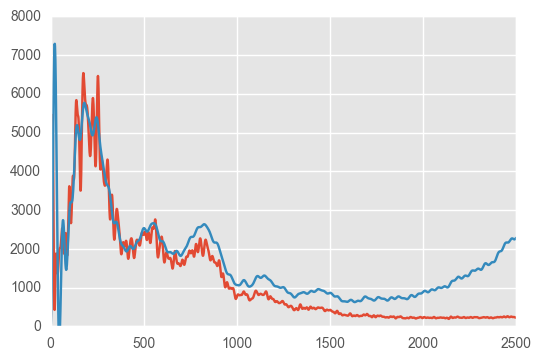

In [49]:
# comparison
scale = 4 * np.pi / ((20/180 * np.pi)**2.)
plt.plot(ana_dl * scale * 10**12)
plt.plot(ell, cl * ell * (ell + 1) / 2 / np.pi * 10 **12.)
plt.xlim(0, 2500)
plt.ylim(0, 8000)

Redo without beam

In [50]:
%%bash
PolSpice_v03-03-01/src/spice -mapfile COM_CMB_IQU-nilc-field-Int_2048_R2.01_full.fits \
-apodizesigma 10 -apodizetype 1 -thetamax 10 -maskfile mask000.220p0.0t.fits \
-verbosity 2 -clfile YES -corfile YES -cl_outmap_file YES -cl_outmask_file YES -fits_out YES -kernelsfileout YES

 WARNING in check_options_choice :
 Polarization is off and output of kernels is activated.
 Output of kernels will be ignored.
 ===> HEALPIXDATA not defined, trying HEALPIX...
 ===> Using HEALPIXDATA=/Users/cicero/Documents/Physics/PLANCK/analysis_tool/Healpix_3.31/data/
 Check header for file ../analysis_tool/PolSpice_v03-03-01/tutorials/cart_mask/COM_CMB_IQU-nilc-field-Int_2048_R2.01_full.fits
 nside for input map file =        2048

 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
 WARNING in check_header:
 I detect multiple maps in file
 ../analysis_tool/PolSpice_v03-03-01/tutorials/cart_mask/COM_CMB_IQU-nilc-field-Int_2048_R2.01_full.fits
 Only the first map will be read.
 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

 WARNING in check_header for file
 ../analysis_tool/PolSpice_v03-03-01/tutorials/cart_mask/COM_CMB_IQU-nilc-field-Int_2048_R2.01_full.fits
 pixel ordering is NESTED :
 data will be reordered before usage
 Check header for file ../analysis_tool/PolSpice_

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


(0, 8000)

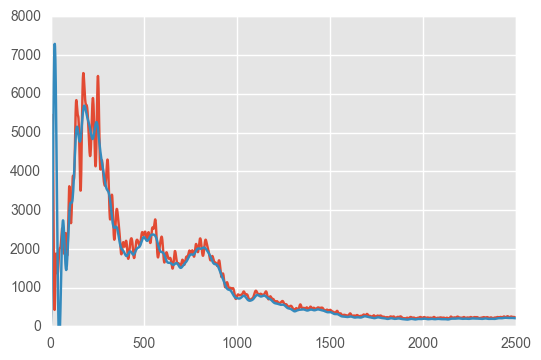

In [53]:
# spice without deconvolve versus anafast
cl_ud = hp.read_cl('spice.cl')
ell   = np.arange(len(cl))
plt.plot(ana_dl * scale * 10**12)
plt.plot(ell, cl_ud * ell * (ell + 1) / 2 / np.pi * 10 **12.)
plt.xlim(0, 2500)
plt.ylim(0, 8000)

**Individual .fits Files**  
There are 3 files generated, `spice.cl`, `spice.rawmap`, `spice.rawmask`, `spice,cor`,  
Let's take a look into them.

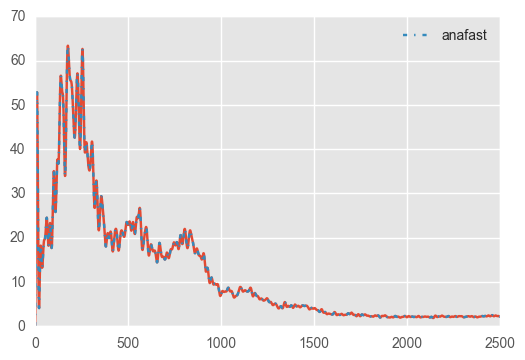

In [83]:
# spicerawmap
cl_raw = hp.read_cl('spice.clrawmap')
ell   = np.arange(len(cl_raw))
plt.plot(ell, cl_raw * ell * (ell + 1) / 2 / np.pi * 10 **12.)
plt.plot(ana_dl * 10**12, ls='-.', label='anafast')
plt.xlim(0, 2500)
plt.legend()

`spice.clrawmap` seems to be the cl without corrected by mask and apodization,  
and it is the same as anafast

Let's take a look at mask cl.

(0, 2500)

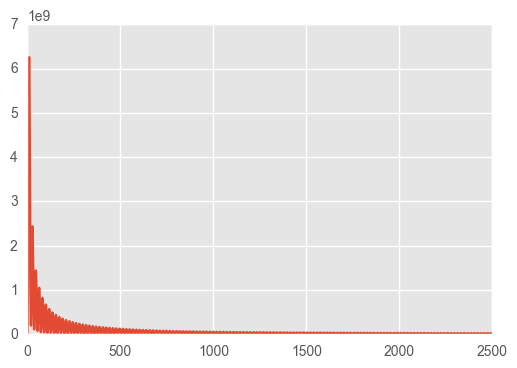

In [67]:
# spicemask
cl_mask = hp.read_cl('../analysis_tool/PolSpice_v03-03-01/tutorials/spice.clrawmasks')
ell   = np.arange(len(cl_mask))
plt.plot(ell, cl_mask * ell * (ell + 1) / 2 / np.pi * 10 **12.)
plt.xlim(0, 2500)

and correlation file via astropy.  
If you don't have `astropy`, install through  
```bash
conda install -c anaconda astropy
```

In [84]:
import astropy.io.fits as fits

In [87]:
cor = fits.open('spice.cor')
cor.info()

Filename: ../analysis_tool/PolSpice_v03-03-01/tutorials/spice.cor
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       7   ()              
1    ANGULAR CORRELATION  TableHDU        44   6144R x 2C   [D24.15, D24.15]   


In [88]:
cor[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2017-03-27T08:05:38' / file creation date (YYYY-MM-DDThh:mm:ss UT)   

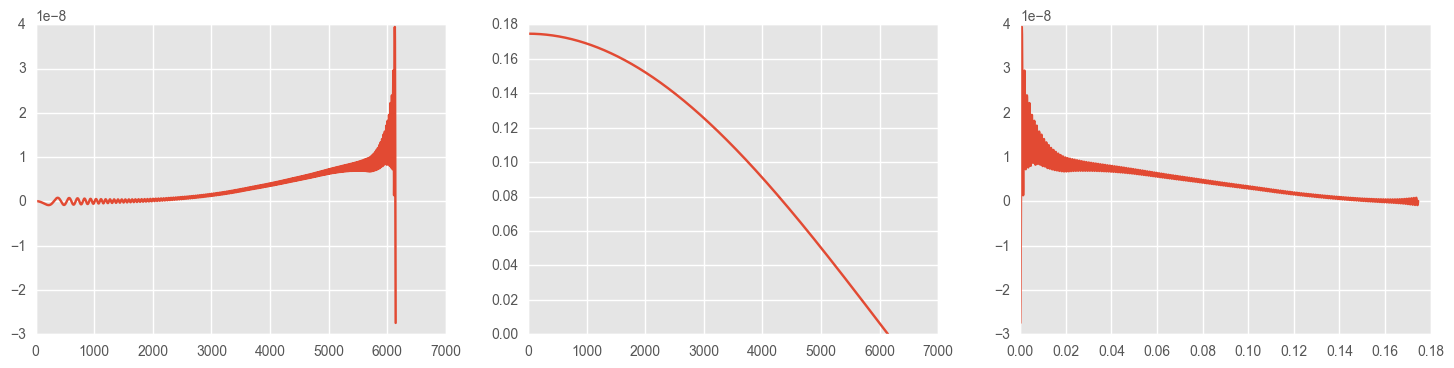

In [89]:
# get numpy array out of fits
data  = cor[1].data
TT    = data['TT']
ANGLE = data['ANGLE']

fig, ax = plt.subplots(1, 3, figsize=(18, 4))
ax[0].plot(TT)
ax[1].plot(ANGLE)
ax[2].plot(ANGLE, TT)

And one more file is corvariance matrix file

In [ ]:
fits.open('../analysis_tool/PolSpice_v03-03-01/tutorials/')